<a href="https://colab.research.google.com/github/Parth-nXp/DNN_mini_project/blob/main/mlp_bottleneck_dropout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
! pip install torchinfo

In [58]:
import torch
import torch.nn as nn
from sklearn.datasets import make_classification
from torch.optim import Adam
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from torchinfo import summary
import matplotlib.pyplot as plt
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


In [59]:
X, y = make_classification(n_samples = 1000,
                           n_features = 20,
                           n_classes = 2)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)


In [60]:
train_dataset = TensorDataset(torch.tensor(X_train, dtype = torch.float32),
                              torch.tensor(y_train, dtype = torch.float32))

test_dataset = TensorDataset(torch.tensor(X_test, dtype = torch.float32),
                             torch.tensor(y_test, dtype = torch.float32))

train_loader = DataLoader(train_dataset, batch_size = 32, shuffle = True)
test_loader = DataLoader(test_dataset, batch_size = 32, shuffle = False)

In [61]:
hidden_layer_1_neurons = 64
hidden_layer_2_neurons = 8


class my_model(nn.Module):
  def __init__(self):
    super(my_model, self).__init__()
    self.linear1 = nn.Linear(20, hidden_layer_1_neurons)
    self.ReLU = nn.ReLU()
    self.Dropout = nn.Dropout(0.2)
    self.linear2 = nn.Linear(hidden_layer_1_neurons, hidden_layer_2_neurons)
    self.linear3 = nn.Linear(hidden_layer_2_neurons, 1)
    self.sigmoid = nn.Sigmoid()

  def forward(self, x):
    x = self.linear1(x)
    x = self.ReLU(x)
    x = self.Dropout(x)
    x = self.linear2(x)
    x = self.ReLU(x)
    x = self.linear3(x)
    x = self.sigmoid(x)

    return x


model = my_model().to(device)
summary(model, input_size = (32, X_train.shape[1]))

Layer (type:depth-idx)                   Output Shape              Param #
my_model                                 [32, 1]                   --
├─Linear: 1-1                            [32, 64]                  1,344
├─ReLU: 1-2                              [32, 64]                  --
├─Dropout: 1-3                           [32, 64]                  --
├─Linear: 1-4                            [32, 8]                   520
├─ReLU: 1-5                              [32, 8]                   --
├─Linear: 1-6                            [32, 1]                   9
├─Sigmoid: 1-7                           [32, 1]                   --
Total params: 1,873
Trainable params: 1,873
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 0.06
Input size (MB): 0.00
Forward/backward pass size (MB): 0.02
Params size (MB): 0.01
Estimated Total Size (MB): 0.03

In [62]:
criterion = nn.BCELoss()
optimizer = Adam(model.parameters(), lr = 0.001)

In [63]:
total_loss_train_plot = []
total_loss_test_plot = []

epochs = 50

for epoch in range(epochs):
  print(f"Epoch: {epoch +1}")
  total_loss_train = 0
  total_loss_test = 0
  model.train()

  for data, label in train_loader:
    data = data.to(device)
    label = label.to(device)
    prediction = model(data).squeeze(-1)
    batch_loss = criterion(prediction, label)
    total_loss_train += batch_loss.item()
    batch_loss.backward()
    optimizer.step()
    optimizer.zero_grad()

  model.eval()
  with torch.no_grad():
    for data, label in test_loader:
      data = data.to(device)
      label = label.to(device)
      prediction = model(data).squeeze(-1)
      batch_loss = criterion(prediction, label)
      total_loss_test += batch_loss.item()

  total_loss_train_plot.append(total_loss_train / len(train_loader))
  total_loss_test_plot.append(total_loss_test / len(test_loader))

  print(f"Epoch {epoch + 1}, Train Loss: {total_loss_train_plot[-1]}, Test Loss: {total_loss_test_plot[-1]}")
  print("="*30)

Epoch: 1
Epoch 1, Train Loss: 0.6949962675571442, Test Loss: 0.6822653174400329
Epoch: 2
Epoch 2, Train Loss: 0.6680907173590227, Test Loss: 0.6561533272266388
Epoch: 3
Epoch 3, Train Loss: 0.636820600791411, Test Loss: 0.6169031798839569
Epoch: 4
Epoch 4, Train Loss: 0.5856518311934038, Test Loss: 0.5559648156166077
Epoch: 5
Epoch 5, Train Loss: 0.5074260763146661, Test Loss: 0.4733296364545822
Epoch: 6
Epoch 6, Train Loss: 0.41040275584567676, Test Loss: 0.3923037379980087
Epoch: 7
Epoch 7, Train Loss: 0.33653991330753674, Test Loss: 0.33807569891214373
Epoch: 8
Epoch 8, Train Loss: 0.28553385219790717, Test Loss: 0.3156587481498718
Epoch: 9
Epoch 9, Train Loss: 0.25349129939621146, Test Loss: 0.30826041251420977
Epoch: 10
Epoch 10, Train Loss: 0.24516647749326445, Test Loss: 0.3097040742635727
Epoch: 11
Epoch 11, Train Loss: 0.23736545680598778, Test Loss: 0.31130716726183894
Epoch: 12
Epoch 12, Train Loss: 0.22562266445972703, Test Loss: 0.31362857297062874
Epoch: 13
Epoch 13, Trai

<function matplotlib.pyplot.show(close=None, block=None)>

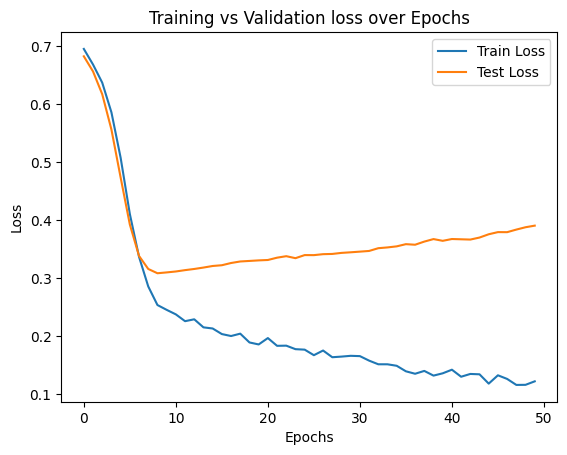

In [64]:
plt.plot(total_loss_train_plot, label = "Train Loss")
plt.plot(total_loss_test_plot, label = "Test Loss")
plt.title("Training vs Validation loss over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show